In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:

print('For printing sample data:')
print(data.head())


For printing sample data:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print('To get total rows and columns:')
print(data.shape)

To get total rows and columns:
(200, 5)


In [ ]:
print('To get info about columns:')
print(data.info())


To get info about columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
data.rename(columns = {'Genre':'Gender'} , inplace = True)
#Describe Datasets
print(data.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
data.drop(labels = 'CustomerID' , axis = 1 , inplace = True)

In [ ]:
print(data.isnull().sum())


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
#Encoding 
print(data.dtypes)
print()

print(data['Gender'].value_counts())

data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)
print(data.info())

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Female    112
Male       88
Name: Gender, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


In [ ]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)
#Dimensionality reduction 
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)
print("data shape after PCA :",data_pca.shape)
print("data_pca is:",data_pca)

data shape after PCA : (200, 2)
data_pca is: [[-4.06382715e-01 -5.20713635e-01]
 [-1.42767287e+00 -3.67310199e-01]
 [ 5.07605706e-02 -1.89406774e+00]
 [-1.69451310e+00 -1.63190805e+00]
 [-3.13108383e-01 -1.81048272e+00]
 [-1.71744627e+00 -1.59926418e+00]
 [ 7.90821124e-01 -1.94727112e+00]
 [-2.14832159e+00 -1.50537369e+00]
 [ 2.77428623e+00 -8.82987672e-01]
 [-1.21629477e+00 -1.61640464e+00]
 [ 2.62905084e+00 -8.61237043e-01]
 [-1.68947038e+00 -1.54542784e+00]
 [ 1.68582253e+00 -2.02394479e+00]
 [-1.64607339e+00 -1.52251259e+00]
 [ 1.17443628e+00 -6.12790961e-01]
 [-1.32613070e+00 -2.36719149e-01]
 [ 1.67728253e-02 -1.74344572e+00]
 [-1.07842454e+00 -2.44715641e-01]
 [ 1.48758780e+00 -5.72676028e-01]
 [-1.66373169e+00 -1.43259774e+00]
 [ 4.88090311e-01 -3.92921145e-01]
 [-1.01895051e+00 -1.66247511e-01]
 [ 1.35891492e+00 -1.82866936e+00]
 [-7.22972722e-01 -1.81687017e-01]
 [ 1.51315931e+00 -1.76451196e+00]
 [-1.06241157e+00 -4.31150614e-02]
 [ 5.88832908e-01 -1.62541614e+00]
 [-2.06188

In [ ]:
plt_font = {'family':'serif' , 'size':16}

In [ ]:
wcss_list = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 1)
  kmeans.fit(data_pca)
  wcss_list.append(kmeans.inertia_)

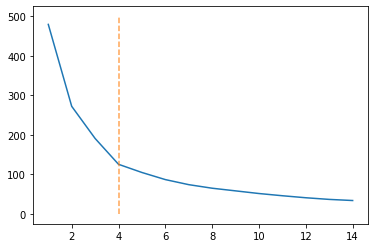

In [ ]:
#X & Y axis range
plt.plot(range(1,15) , wcss_list)
plt.plot([4,4] , [0 , 500] , linestyle = '--' , alpha = 0.7)


In [ ]:
plt.text(4.2 , 300 , 'Elbow = 4')
#X & Y axis labels
plt.xlabel('K' , fontdict = plt_font)
plt.ylabel('WCSS' , fontdict = plt_font)


Text(0, 0.5, 'WCSS')

In [ ]:
plt.show()

In [ ]:
#KMeans Algorithm
kmeans = KMeans(n_clusters = 4 , init = 'k-means++' , random_state = 1)
kmeans.fit(data_pca)
cluster_id = kmeans.predict(data_pca)
result_data = pd.DataFrame()
result_data['PC1'] = data_pca[:,0]
result_data['PC2'] = data_pca[:,1]
result_data['ClusterID'] = cluster_id

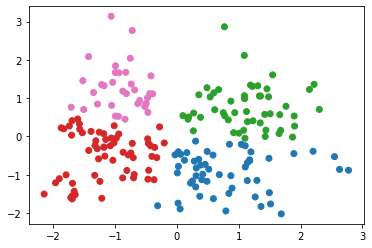

In [ ]:
cluster_colors = {0:'tab:red' , 1:'tab:green' , 2:'tab:blue' , 3:'tab:pink'}
cluster_dict = {'Centroid':'tab:orange','Cluster0':'tab:red' , 'Cluster1':'tab:green'
, 'Cluster2':'tab:blue' , 'Cluster3':'tab:pink'}
#Scatter data
#X & Y Value, result & cluster colors
plt.scatter(x = result_data['PC1'] , y = result_data['PC2']
, c = result_data['ClusterID'].map(cluster_colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8)
for k, v in cluster_dict.items()]


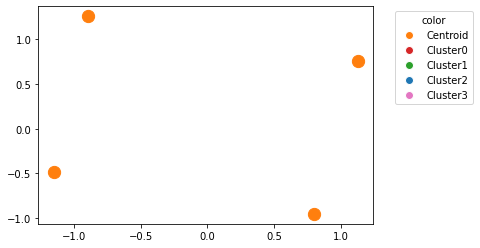

In [ ]:
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.scatter(x = kmeans.cluster_centers_[:,0] , y = kmeans.cluster_centers_[:,1] ,
marker = 'o' , c = 'tab:orange', s = 150 , alpha = 1)

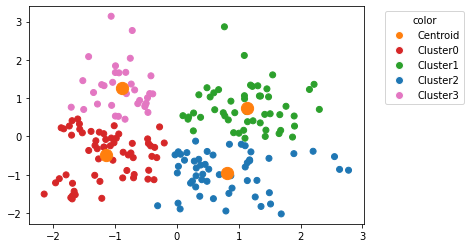

In [ ]:
cluster_colors = {0:'tab:red' , 1:'tab:green' , 2:'tab:blue' , 3:'tab:pink'}
cluster_dict = {'Centroid':'tab:orange','Cluster0':'tab:red' , 'Cluster1':'tab:green'
, 'Cluster2':'tab:blue' , 'Cluster3':'tab:pink'}
#Scatter data
#X & Y Value, result & cluster colors
plt.scatter(x = result_data['PC1'] , y = result_data['PC2']
, c = result_data['ClusterID'].map(cluster_colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8)
for k, v in cluster_dict.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.scatter(x = kmeans.cluster_centers_[:,0] , y = kmeans.cluster_centers_[:,1] ,
marker = 'o' , c = 'tab:orange', s = 150 , alpha = 1)